<a href="https://colab.research.google.com/github/anishdevadiga/Machine_Learning/blob/main/multiLinearRegresson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Actual vs Predicted
     Actual  Predicted
0        4   3.033124
1        4   3.305600
2        1   1.736594
3        1   0.668179
4        2   1.854916
5        1   1.152788
6        4   3.333711
7        2   1.887084
8        2   1.772372
9        4   3.896101
10       4   3.753955
11       3   4.026173
12       3   3.438598
13       3   3.423274
14       4   3.200802
15       4   3.856396
16       4   4.417470
17       1   1.488228
18       2   0.979940
19       1   0.960081
20       1   0.843031
21       2   2.123351
22       2   2.248727
23       4   4.221659
24       2   1.881413
25       1   1.197874
26       2   2.932866
27       2   2.055704
28       4   5.195826
29       6   5.266566
30       8   7.239527
31       2   2.608070

Accuracy : - 0.8735577163537018


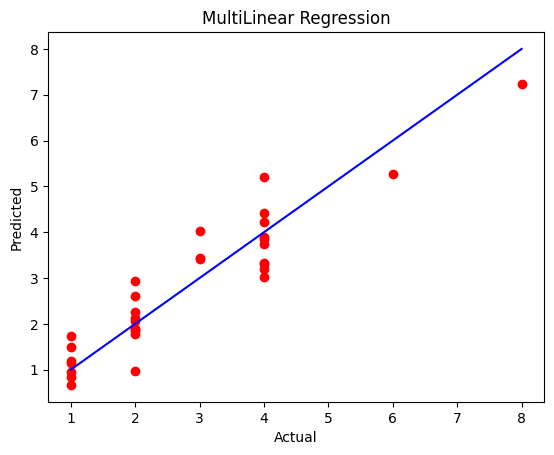

In [5]:
#mtcars dataset
mtcars=pd.read_csv("/content/drive/My Drive/mtcars.csv")
X_mtcars=mtcars[['cyl','disp','hp','drat','wt','qsec','vs','am','gear']].values
y_mtcars=mtcars['carb'].values

model=LinearRegression()
model.fit(X_mtcars,y_mtcars)
y_pred=model.predict(X_mtcars)
resultDataSet=pd.DataFrame({'Actual':y_mtcars,'Predicted':y_pred})
print("Actual vs Predicted\n",resultDataSet)
print("\nAccuracy : -",model.score(X_mtcars,y_mtcars))

#plotting
plt.scatter(y_mtcars,y_pred,color='red')
plt.plot([min(y_mtcars),max(y_mtcars)],[min(y_mtcars),max(y_mtcars)],color='blue')
plt.title('MultiLinear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


Accuracy : - 0.5278909357356787


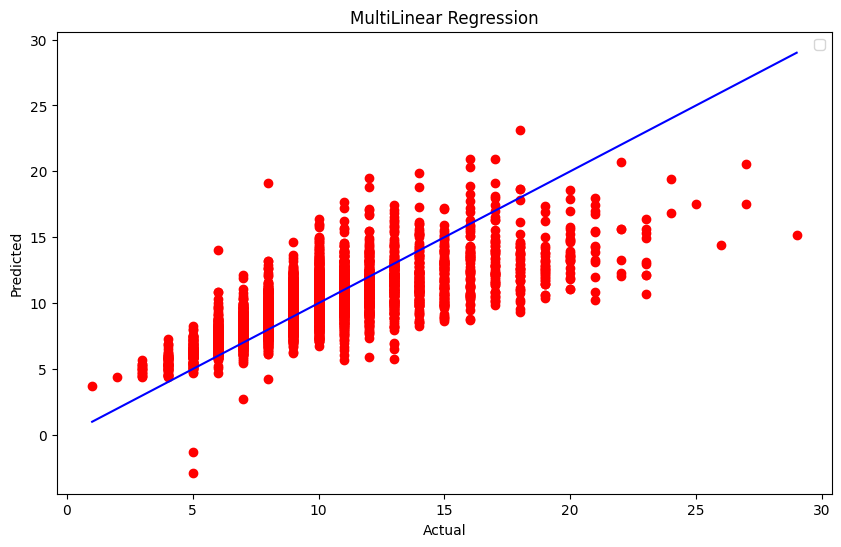

In [12]:
#abalone dataset
from sklearn.preprocessing import LabelEncoder
abalone=pd.read_csv("/content/drive/My Drive/abalone.csv")

label_encoder=LabelEncoder()
abalone['Sex']=label_encoder.fit_transform(abalone['Sex'])
X_abalone=abalone[['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']].values
y_abalone=abalone['Rings'].values

model_abalone=LinearRegression()
model_abalone.fit(X_abalone,y_abalone)

y_abalone_pred=model_abalone.predict(X_abalone)
resultDataSet=pd.DataFrame({'Actual':y_abalone,'Predicted':y_abalone_pred})
print("\nAccuracy : -",model_abalone.score(X_abalone,y_abalone))

plt.figure(figsize=(10,6))
plt.scatter(y_abalone,y_abalone_pred,color='red')
plt.plot([min(y_abalone),max(y_abalone)],[min(y_abalone),max(y_abalone)],color='blue')
plt.title('MultiLinear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()